In [248]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

# Ver los 1ros registros
data.head()

,Unnamed: 0,hors,ws,wd,anno,mes,dia,horsObs,wp1
0,4,5,2.93,120.13,2009,7,1,0,0.035
1,5,6,2.96,115.79,2009,7,1,0,0.005
2,6,7,2.81,106.71,2009,7,1,0,0.000
3,7,8,2.73,95.39,2009,7,1,0,0.000
4,8,9,2.87,88.50,2009,7,1,0,0.010


In [249]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Unnamed: 0,hors,ws,wd,anno,mes,dia,horsObs,wp1
count,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.0,46670.000000
mean,51991.722391,26.303535,4.086178,144.656111,2010.476730,6.567645,15.659289,0.0,0.249156
std,30274.923342,12.695585,1.812752,93.496052,0.954449,3.446999,8.785903,0.0,0.236969
min,4.000000,5.000000,0.020000,0.020000,2009.000000,1.000000,1.000000,0.0,0.000000
25%,25764.250000,15.000000,2.800000,72.832500,2010.000000,4.000000,8.000000,0.0,0.060000
50%,51593.500000,26.000000,3.750000,122.435000,2010.000000,7.000000,16.000000,0.0,0.175000
75%,78087.750000,37.000000,5.120000,196.747500,2011.000000,10.000000,23.000000,0.0,0.372000
max,104783.000000,48.000000,13.900000,359.980000,2012.000000,12.000000,31.000000,0.0,0.947000


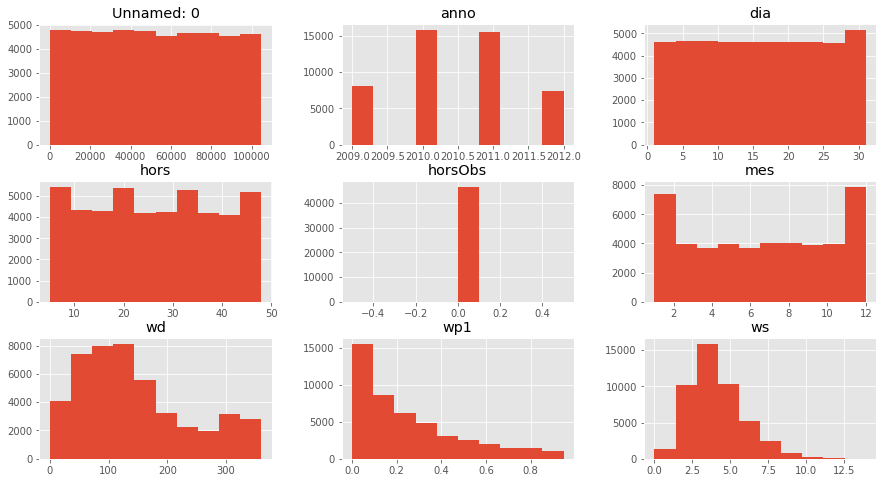

In [250]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

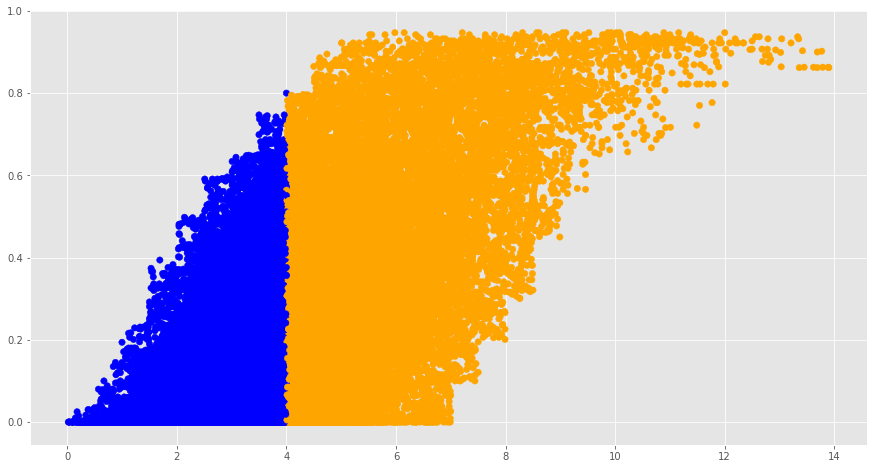

In [251]:
colores=['orange','blue']
tamanios=[40,60]
 
f1 = data['ws'].values
f2 = data['wp1'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['ws']>4):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [252]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
filtered_data = data
dataX =filtered_data[["ws"]]
X_train = np.array(dataX)
y_train = filtered_data['wp1'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.08736938]
Independent term: 
 -0.10785080036779507
Mean squared error: 0.03
Variance score: 0.45


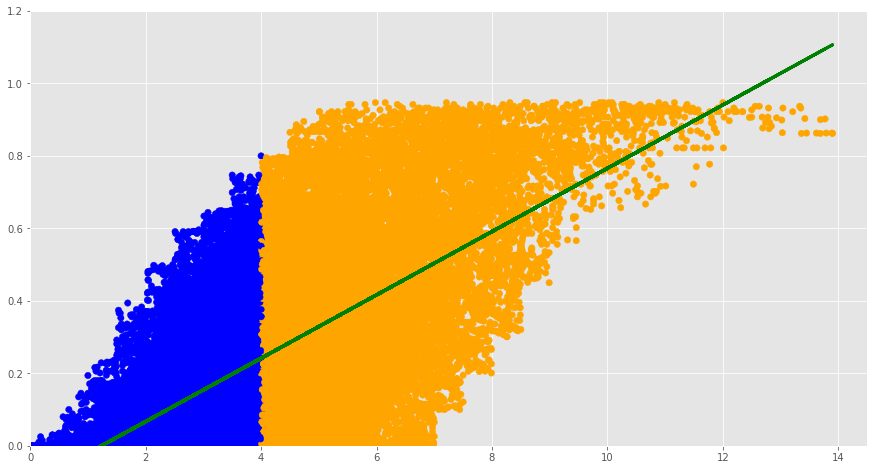

In [253]:
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
#plt.show()
plt.axis([0, 14.5, 0, 1.2, ])

plt.plot(X_train, y_pred, color='green',
linewidth=3, label=u'Regresión MCO')

In [241]:
#Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:
5
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
    #y_12 = regr.predict([[12]])
    #print(y_12)

5